In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel('Sample - Superstore.xls')
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [3]:
def data_description(data):
    print(data.head())
    print(data.info())
    print(data.describe())
    print(data.dtypes)
    print(data.columns)
    for i in data.columns:
        print(i,'>>>>',len(np.unique(data[i])))
    print(sns.heatmap(data.corr(),annot=True))
    return

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

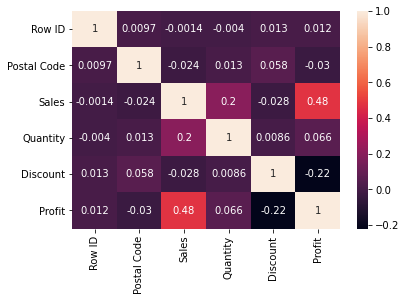

In [4]:
data_description(data)

# Pivot table

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
def task4(data):
    pv1=pd.pivot_table(data,index=('Sub-Category'),values=['Sales','Profit'],aggfunc='mean').reset_index()
    pv1.columns=['Sub-Category','sales_mean','Profit_mean']
    pv2=pd.pivot_table(data,index=('Sub-Category'),values=['Sales','Profit'],aggfunc='std').reset_index()
    pv2.columns=['Sub-Category','sales_std','Profit_std']
    PV=pd.merge(pv1,pv2,on='Sub-Category',how='left')
    PV['profit_diff']=PV['Profit_mean']-PV['Profit_std']
    PV['sales_diff']=PV['sales_mean']-PV['sales_std']
    ans=(PV.sort_values(by=['sales_diff'],ascending=False))
    print(ans)
    plt.figure(figsize = (14,14))
    plt.barh(ans['Sub-Category'],ans['sales_diff'],alpha=0.7)
    plt.barh(ans['Sub-Category'],ans['profit_diff'],alpha=0.4)
    return
    
    

   Sub-Category  sales_mean  Profit_mean    sales_std   Profit_std  \
8     Fasteners    4.375660    13.936774     5.055053    12.416593   
2           Art    8.200737    34.068834    13.384264    60.122465   
7     Envelopes   27.418019    64.867724    35.354983    84.351633   
12        Paper   24.856620    57.284092    35.225214    78.167639   
10       Labels   15.236962    34.303055    34.084127    74.119287   
9   Furnishings   13.645918    95.825668    52.753228   147.893640   
0   Accessories   54.111788   215.974604   106.155455   334.965015   
14      Storage   25.152277   264.590553    81.923600   355.222507   
13       Phones   50.073938   371.211534   113.251277   491.457343   
5        Chairs   43.095894   532.332420   127.099922   550.148243   
1    Appliances   38.922758   230.755710   148.319146   388.949643   
15     Supplies   -6.258418   245.650200   105.059628   923.828753   
4     Bookcases  -15.230509   503.859633   182.034224   638.748523   
16       Tables  -55

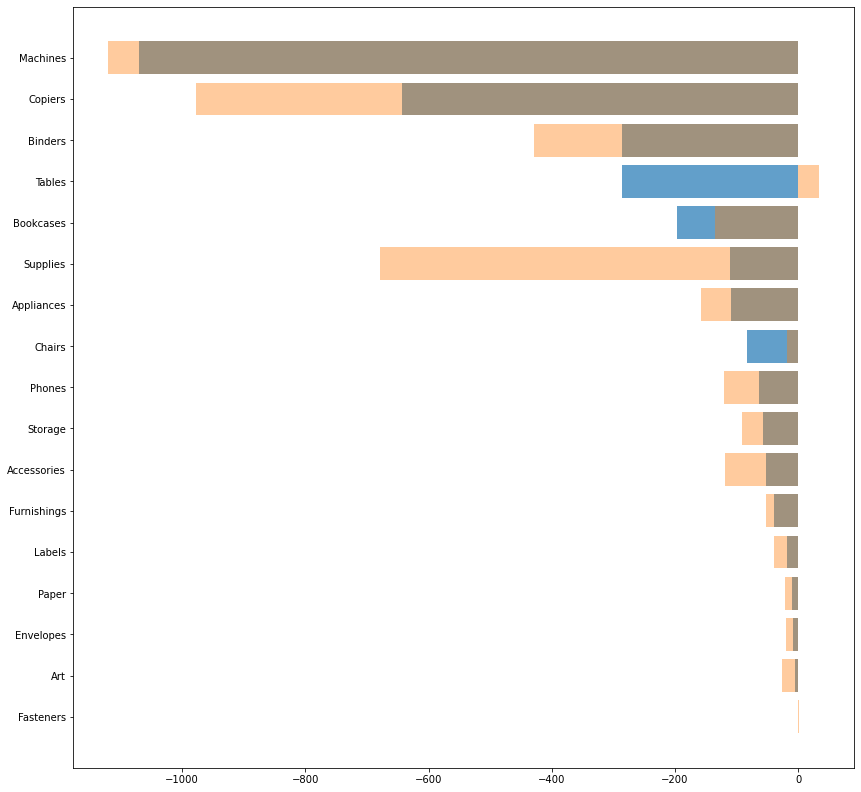

In [7]:
task4(data)

In [8]:
data.groupby(['Region','Customer ID']).agg({'Sales':'sum'}).reset_index()

,Region,Customer ID,Sales
0,Central,AA-10315,4780.552
1,Central,AA-10375,178.370
2,Central,AA-10480,1747.500
3,Central,AA-10645,1971.460
4,Central,AB-10015,576.564
...,...,...,...
2496,West,XP-21865,660.190
2497,West,YC-21895,1215.676
2498,West,YS-21880,5754.172
2499,West,ZC-21910,2641.089


In [9]:
customerName=pd.pivot_table(data,index=['Customer ID'],values=['Sales'],aggfunc='sum')\
        .reset_index().sort_values(by='Sales',ascending=False).head(20)
customerName

,Customer ID,Sales
700,SM-20320,25043.050
741,TC-20980,19052.218
621,RB-19360,15117.339
730,TA-21385,14595.620
6,AB-10105,14473.571
434,KL-16645,14175.229
669,SC-20095,14142.334
327,HL-15040,12873.298
683,SE-20110,12209.438
131,CC-12370,12129.072


In [10]:
customer=pd.pivot_table(data,index=['Customer ID'],values=['Sales'],aggfunc='sum')\
         .reset_index().sort_values(by='Sales',ascending=False).head(20)['Customer ID'].values
customer

array(['SM-20320', 'TC-20980', 'RB-19360', 'TA-21385', 'AB-10105',
       'KL-16645', 'SC-20095', 'HL-15040', 'SE-20110', 'CC-12370',
       'TS-21370', 'GT-14710', 'BM-11140', 'SV-20365', 'CJ-12010',
       'CL-12565', 'ME-17320', 'KF-16285', 'BS-11365', 'EH-13765'],
      dtype=object)

In [11]:
# plt.figure(figsize=(12,5))
# plt.xticks(rotation= 90)
# sns.barplot(x=customer['Customer ID'],y=customer['Sales'])

In [12]:
pd.unique(data['Region'])

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
filtData=data[(data['Customer ID'].isin(customer))]
filtData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
111,112,CA-2016-128867,2016-11-03,2016-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,50322,Central,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.7880
112,113,CA-2016-128867,2016-11-03,2016-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,50322,Central,OFF-BI-10003981,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.240,6,0.0,13.3476
164,165,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,OFF-AR-10004441,Office Supplies,Art,BIC Brite Liner Highlighters,9.936,3,0.2,2.7324
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
166,167,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,OFF-ST-10000991,Office Supplies,Storage,Space Solutions HD Industrial Steel Shelving.,275.928,3,0.2,-58.6347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9850,CA-2014-142979,2014-04-12,2014-04-18,Standard Class,EH-13765,Edward Hooks,Corporate,United States,Lodi,...,95240,West,OFF-AR-10002987,Office Supplies,Art,Prismacolor Color Pencil Set,39.680,2,0.0,16.2688
9850,9851,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2,0.0,4.0192
9851,9852,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90.480,3,0.2,33.9300
9852,9853,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168


In [14]:
savThePivT=pd.pivot_table(filtData,index='Sub-Category',columns=['Region'],values=['Sales']).round(decimals=0)#.sort_values(by='Sales')

In [15]:
savThePivT.columns

MultiIndex([('Sales', 'Central'),
            ('Sales',    'East'),
            ('Sales',   'South'),
            ('Sales',    'West')],
           names=[None, 'Region'])

In [16]:
savThePivT.columns=['_'.join(i) for i in savThePivT.columns]

In [17]:

savThePivT.fillna(0)

,Sales_Central,Sales_East,Sales_South,Sales_West
Sub-Category,,,,
Accessories,36.0,101.0,498.0,125.0
Appliances,122.0,223.0,0.0,207.0
Art,27.0,50.0,11.0,40.0
Binders,1487.0,274.0,427.0,42.0
Bookcases,1023.0,996.0,146.0,413.0
Chairs,1017.0,787.0,1668.0,576.0
Copiers,10150.0,7675.0,0.0,8400.0
Envelopes,35.0,58.0,23.0,93.0
Fasteners,16.0,4.0,25.0,7.0


In [18]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [19]:
trace1 = go.Bar(
    x=savThePivT.index,
    y=savThePivT.Sales_Central,
    name = "Central"
)
trace2 = go.Bar(
    x=savThePivT.index,
    y=savThePivT.Sales_East,
    xaxis='x2',
    yaxis='y2',
    name = "East"
)
trace3 = go.Bar(
    x=savThePivT.index,
    y=savThePivT.Sales_South,
    xaxis='x3',
    yaxis='y3',
    name = "South"
)
trace4 = go.Bar(
    x=savThePivT.index,
    y=savThePivT.Sales_West,
    xaxis='x4',
    yaxis='y4',
    name = "West"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Sub-Categories where Top 20 Customers that have Sales more than the other Sub-Categories in the same Region.'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [20]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(
#     rows=2, cols=2,
#      specs=[[{},{}],
#            [{"colspan": 2,"rowspan": 2}, None]],
#     subplot_titles=("Central","East", "South","West"))

# fig.add_trace(go.Scatter(x=savThePivT.index,y=savThePivT.Sales_Central),
#                  row=1, col=1)
# fig.add_trace(go.Scatter(x=savThePivT.index,y=savThePivT.Sales_East),
#                  row=1, col=2)
# fig.add_trace(go.Scatter(x=savThePivT.index,y=savThePivT.Sales_South),
#                  row=2, col=1)
# fig.add_trace(go.Scatter(x=savThePivT.index,y=savThePivT.Sales_West),
#                  row=2, col=2)

# fig.update_layout(showlegend=False, title_text="Sub-Categories where Top 20 Customers that have Sales more than the other Sub-Categories in the same Region")

# # fig.update_layout(height=700, showlegend=False)
# fig.show()

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type': 'Bar'},    {'type': 'Bar'}],
                           [{'type': 'Bar'}, {'type': 'Bar'}]],
                   subplot_titles=("Central","East", "South","West"))

fig.add_traces(
    [go.Bar(x=savThePivT.index,y=savThePivT.Sales_Central),
     go.Bar(x=savThePivT.index,y=savThePivT.Sales_East),
     go.Bar(x=savThePivT.index,y=savThePivT.Sales_South),
     go.Bar(x=savThePivT.index,y=savThePivT.Sales_West)],
    rows=[1, 1, 2, 2],
    cols=[1, 2, 1, 2])
fig.update_layout(showlegend=False, title_text="Sub-Categories where Top 20 Customers that have Sales more than the other Sub-Categories in the same Region")

# fig.update_layout(height=700, showlegend=False)
fig.show()

# identify the Regions where Top 20 Customers overall Profit Ratio (Profit as % of Sales)

In [24]:
filtData['Profit_ratio']=(filtData['Profit']/filtData['Sales'])*100
filtData['Profit_ratio']=filtData['Profit_ratio'].round(decimals=0)

In [25]:
filtData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_ratio
111,112,CA-2016-128867,2016-11-03,2016-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,Central,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.7880,30.0
112,113,CA-2016-128867,2016-11-03,2016-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,Central,OFF-BI-10003981,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.240,6,0.0,13.3476,49.0
164,165,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Central,OFF-AR-10004441,Office Supplies,Art,BIC Brite Liner Highlighters,9.936,3,0.2,2.7324,28.0
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,-17.0
166,167,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Central,OFF-ST-10000991,Office Supplies,Storage,Space Solutions HD Industrial Steel Shelving.,275.928,3,0.2,-58.6347,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,9850,CA-2014-142979,2014-04-12,2014-04-18,Standard Class,EH-13765,Edward Hooks,Corporate,United States,Lodi,...,West,OFF-AR-10002987,Office Supplies,Art,Prismacolor Color Pencil Set,39.680,2,0.0,16.2688,41.0
9850,9851,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,East,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2,0.0,4.0192,32.0
9851,9852,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,East,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90.480,3,0.2,33.9300,37.0
9852,9853,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168,46.0


In [26]:
ans2=pd.pivot_table(filtData,index=['Sub-Category'],columns=['Region'],values=['Profit_ratio'],aggfunc='mean')

In [27]:
ans2.columns

MultiIndex([('Profit_ratio', 'Central'),
            ('Profit_ratio',    'East'),
            ('Profit_ratio',   'South'),
            ('Profit_ratio',    'West')],
           names=[None, 'Region'])

In [28]:
ans2.columns=['_'.join(i) for i in ans2.columns]

In [29]:
ans2.sort_values(by=['Profit_ratio_Central'],ascending=False)

,Profit_ratio_Central,Profit_ratio_East,Profit_ratio_South,Profit_ratio_West
Sub-Category,,,,
Labels,47.000000,50.000000,48.000000,47.500000
Paper,40.285714,42.000000,42.200000,47.437500
Copiers,39.500000,27.000000,NaN,41.000000
Envelopes,39.000000,41.500000,47.000000,44.777778
Fasteners,34.500000,41.000000,16.000000,33.000000
Art,19.444444,24.909091,22.750000,28.200000
Phones,17.444444,19.285714,22.800000,11.200000
Accessories,15.750000,29.444444,37.000000,19.166667
Supplies,15.500000,5.750000,12.000000,-2.000000


In [30]:
ans_t=ans2.T
ans_t.columns

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Sub-Category')

In [31]:

ans_t

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Profit_ratio_Central,15.750000,-187.25,19.444444,-22.733333,-3.0,-1.500000,39.5,39.000000,34.5,-25.583333,47.0,-2.500000,40.285714,17.444444,-5.875000,15.50,-41.0
Profit_ratio_East,29.444444,26.00,24.909091,15.562500,-8.0,8.384615,27.0,41.500000,41.0,29.090909,50.0,32.000000,42.000000,19.285714,5.923077,5.75,-19.0
Profit_ratio_South,37.000000,NaN,22.750000,26.666667,16.0,15.000000,NaN,47.000000,16.0,30.285714,48.0,7.333333,42.200000,22.800000,15.250000,12.00,-17.0
Profit_ratio_West,19.166667,31.00,28.200000,26.133333,-88.0,1.833333,41.0,44.777778,33.0,30.000000,47.5,9.500000,47.437500,11.200000,12.800000,-2.00,-24.0


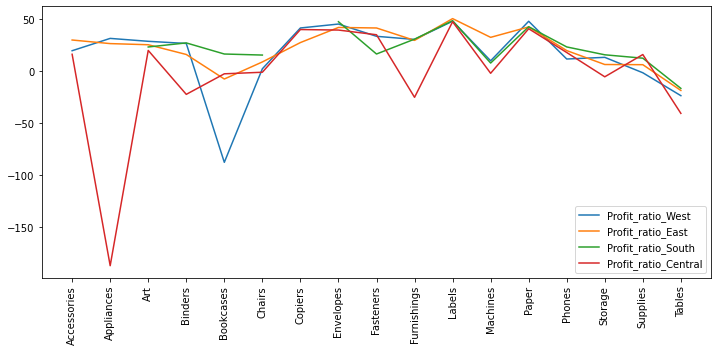

In [32]:

plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.plot(ans_t.loc['Profit_ratio_West'],linestyle='-')
plt.plot(ans_t.loc['Profit_ratio_East'])
plt.plot(ans_t.loc['Profit_ratio_South'])
plt.plot(ans_t.loc['Profit_ratio_Central'])
plt.legend(['Profit_ratio_West','Profit_ratio_East','Profit_ratio_South','Profit_ratio_Central'])
plt.show()


In [33]:
# load time series dataset
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power.columns


Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [34]:
df_power.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [35]:
def data_description(data):
    print(data.head())
    print(data.info())
    print(data.describe())
    print(data.dtypes)
    print(data.columns)
    for i in data.columns:
        print(i,'>>>>',len(np.unique(data[i])))
    print(sns.heatmap(data.corr(),annot=True))
    return

         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB
None
       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.3198

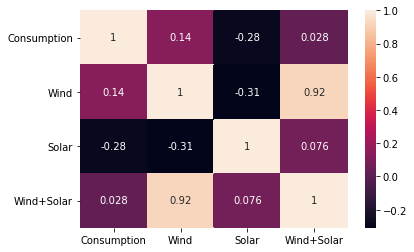

In [36]:
data_description(df_power)

In [37]:
df_power['Date']=pd.to_datetime(df_power['Date'])

In [38]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

clean up data

In [39]:
dfnan=df_power[df_power.isna().any(axis=1)]
dfnan.head()
df_power.fillna()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [40]:
df_power=df_power.dropna(how='all')

In [41]:

df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [42]:
df_power['Year']=df_power.index.year
df_power['month']=df_power.index.month
df_power['day']=df_power.index.weekday
df_power.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
Year             int64
month            int64
day              int64
dtype: object

In [43]:
dictCheck=({0:'Monday',
           1:'Tuesday',
           2:'Wednesday',
           3:'Thursday',
           4:'Friday',
           5:'Saturday',
           6:'Sunday'})

In [44]:
df_power['day']=df_power['day'].map(dictCheck)#function, dict, or Series

In [45]:
df_power.tail(10)

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

In [47]:
# 1.Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the pandas's plot() method.

# df_power['Consumption'].plot(linewidth=0.4)
# 2.cols_to_plot = ['Consumption', 'Solar', 'Wind']
# axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily Totals (GWh)')
# 3.ax = df_power.loc['2016', 'Consumption'].plot()
# ax.set_ylabel('Daily Consumption (GWh)');
# 4.ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)');
# 5.ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)');
# 6.
# # import dates module from matplotlib 
# import matplotlib.dates as mdates

# # plot graph
# fig, ax = plt.subplots()

# ax.plot(df_power.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)')
# ax.set_title('Jan-Feb 2017 Electricity Consumption')

# # to set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# # to set format for x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# 7.fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
# for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
#   sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
#   ax.set_ylabel('GWh')
#   ax.set_title(name)
#   if ax != axes[-1]:
#     ax.set_xlabel('')  
# 8.sns.boxplot(data=df_power, x='Weekday Name', y='Consumption');
# 9.columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# power_weekly_mean = df_power[columns].resample('W').mean()
# power_weekly_mean.head(10)
# 10.start, end = '2016-01', '2016-06'
# fig, ax = plt.subplots()

# ax.plot(df_power.loc[start:end, 'Solar'],
# marker='.', linestyle='-', linewidth=0.5, label='Daily')
# ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
# marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
# ax.set_ylabel('Solar Production in (GWh)')
# ax.legend();

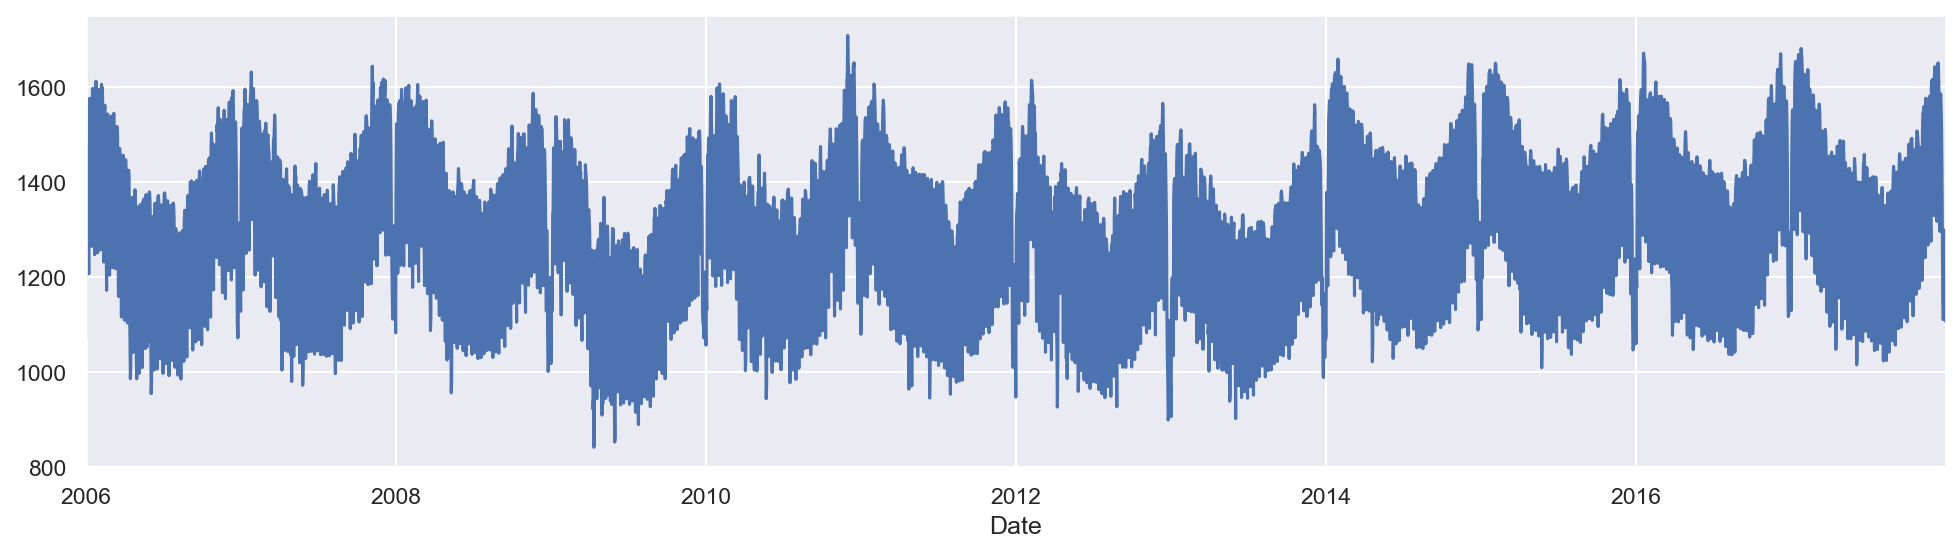

In [48]:
df_power['Consumption'].plot()

Text(0.5, 1.0, 'Year wise Consumption')

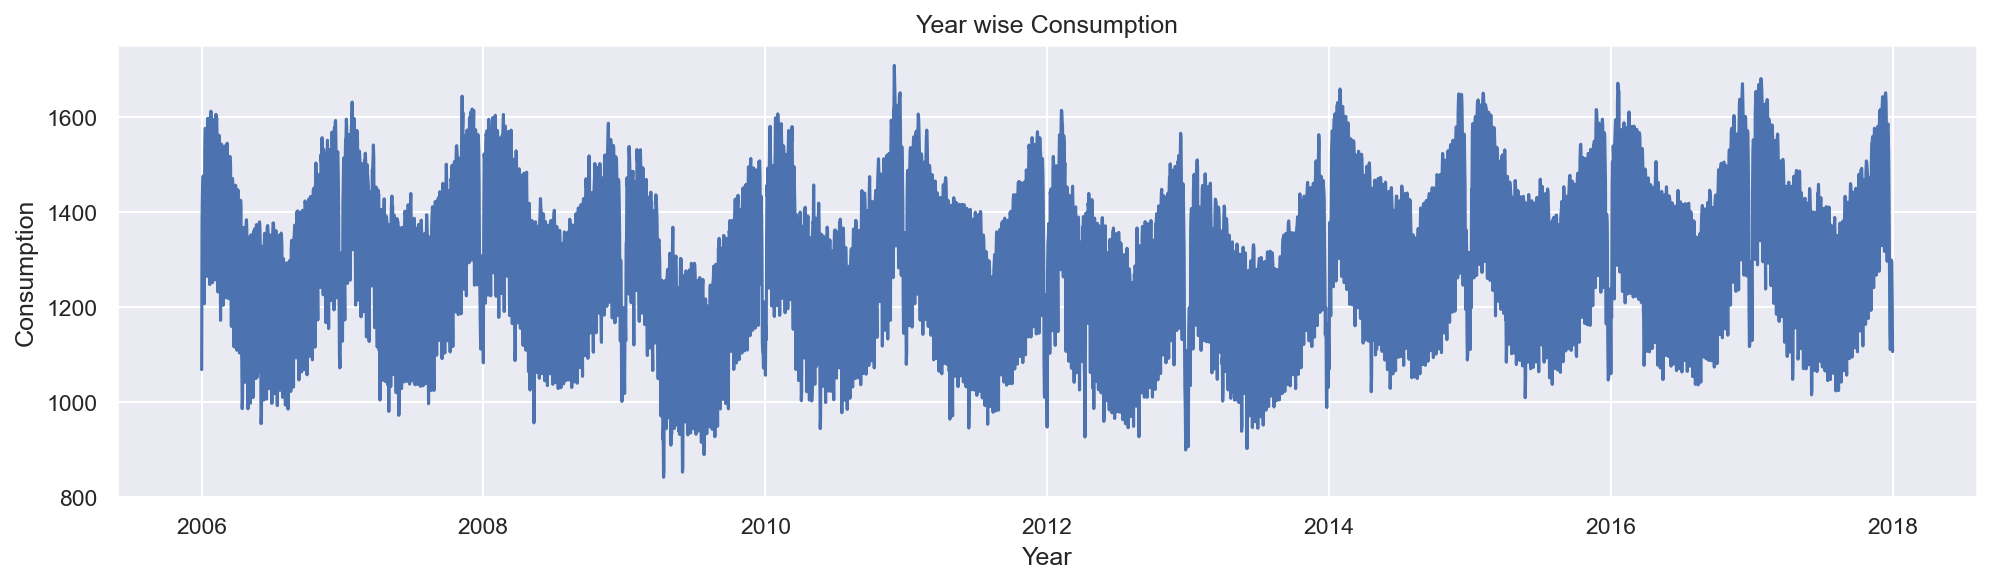

In [49]:
plt.plot(df_power['Consumption'])
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Year wise Consumption')

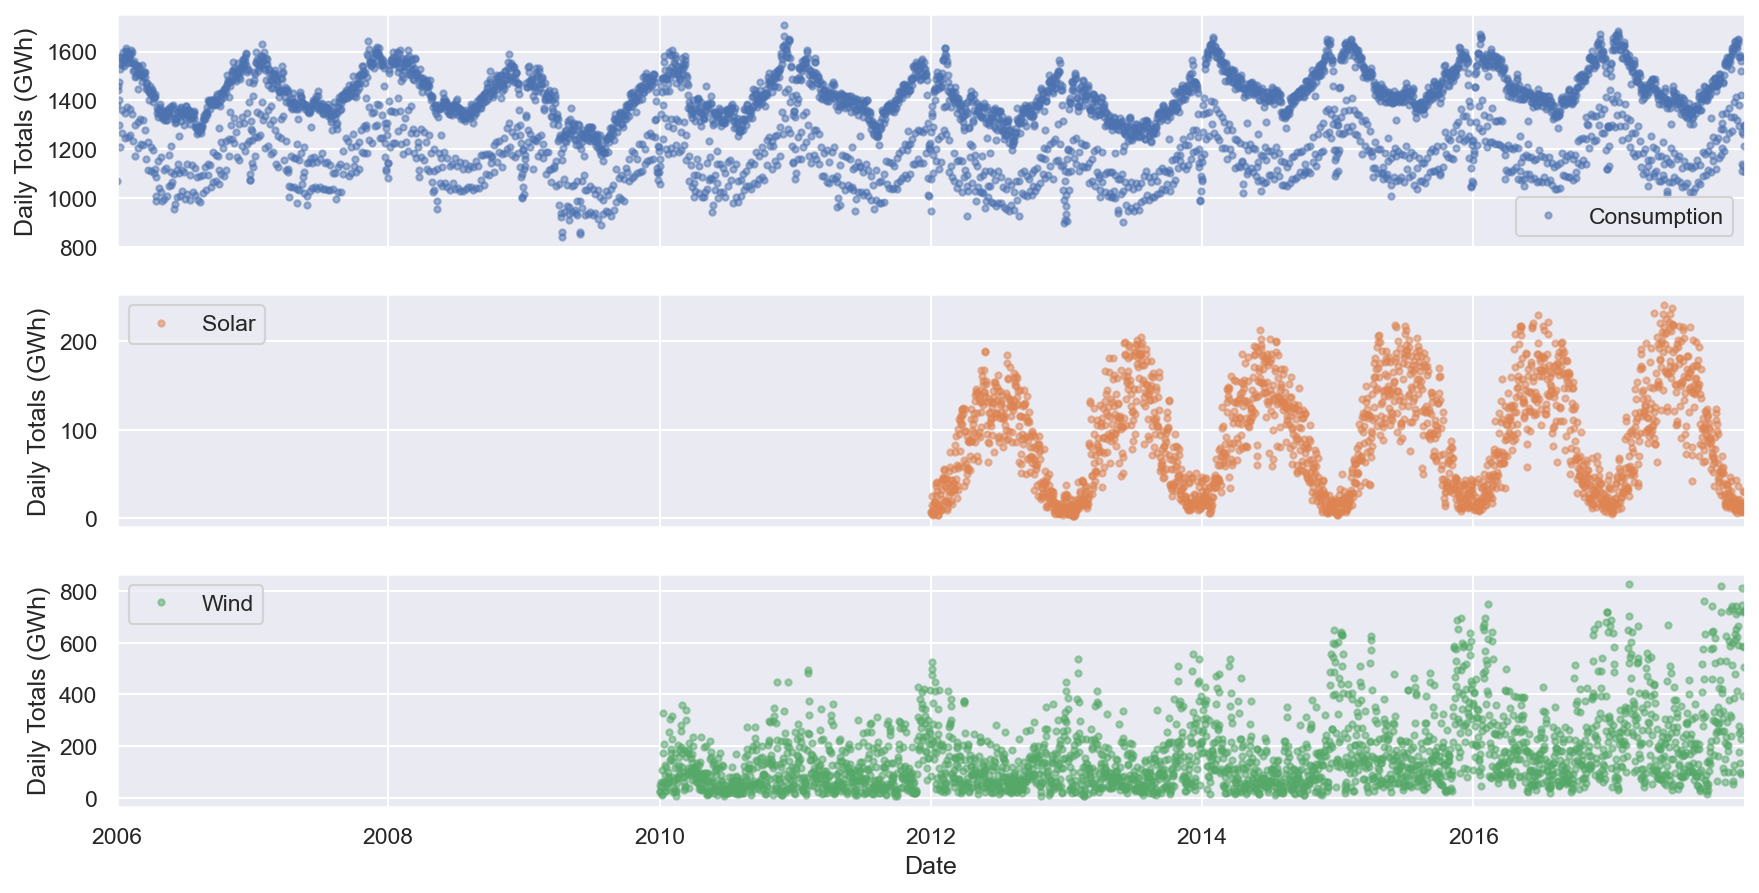

In [50]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

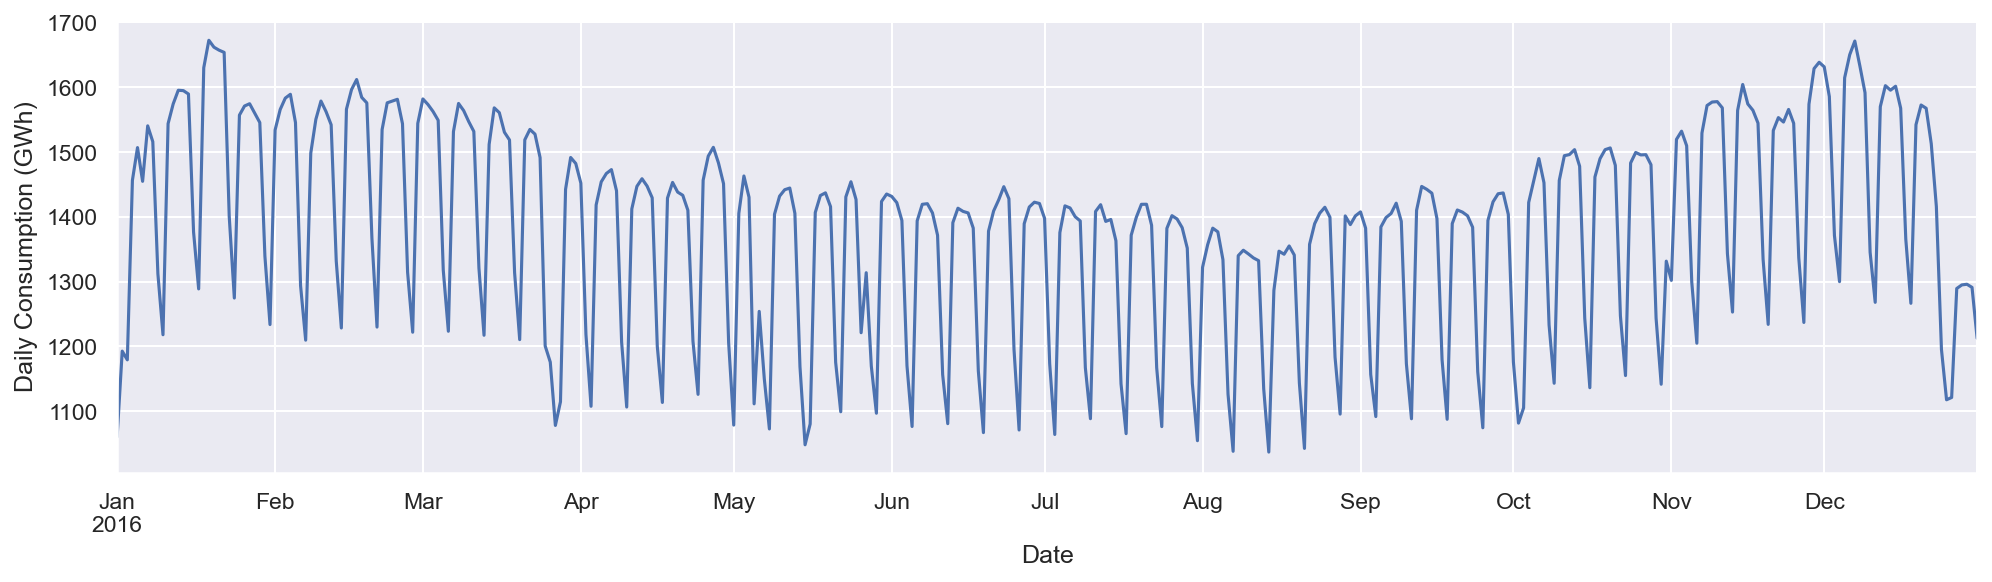

In [51]:
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

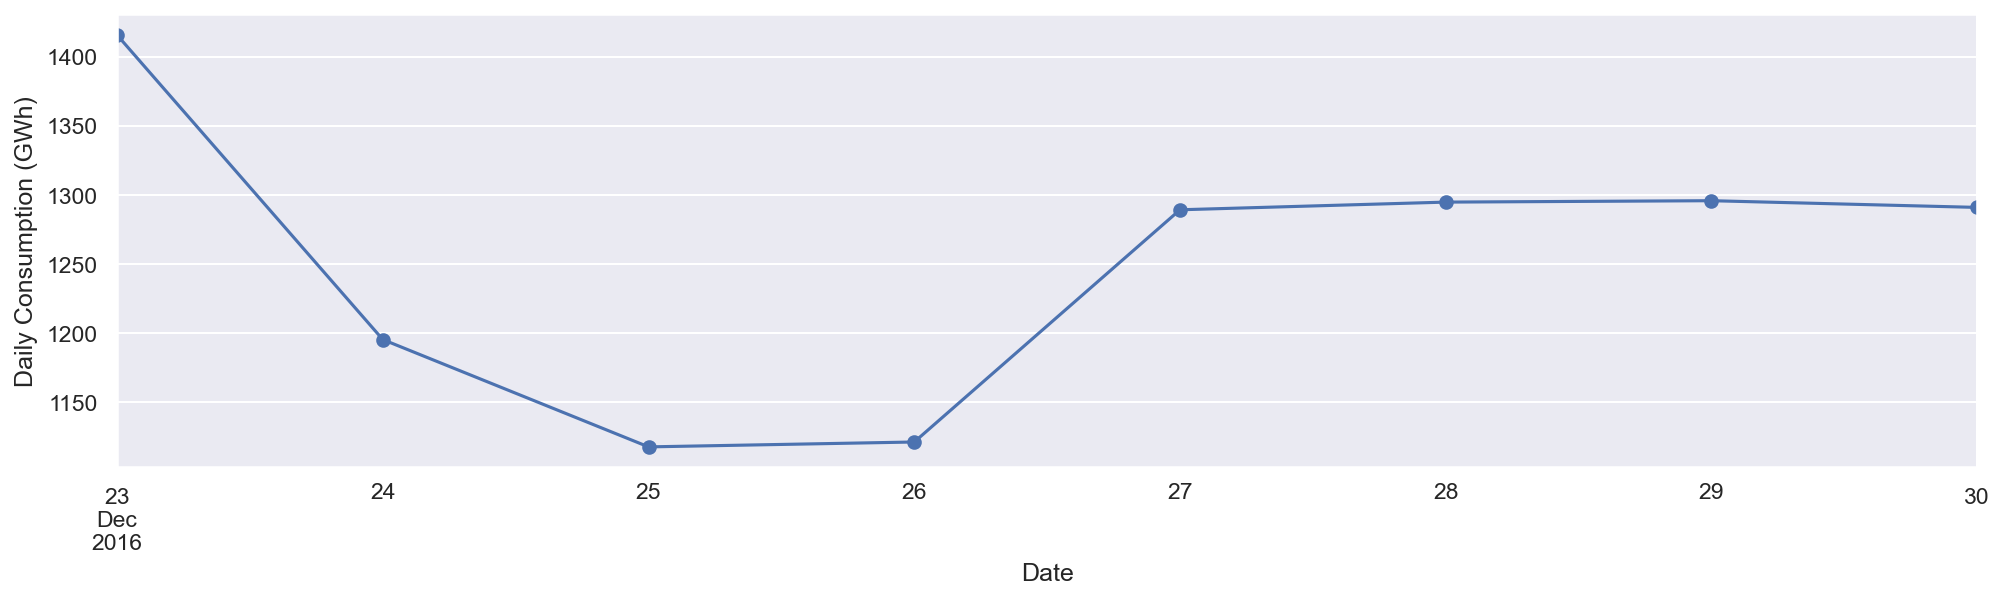

In [52]:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

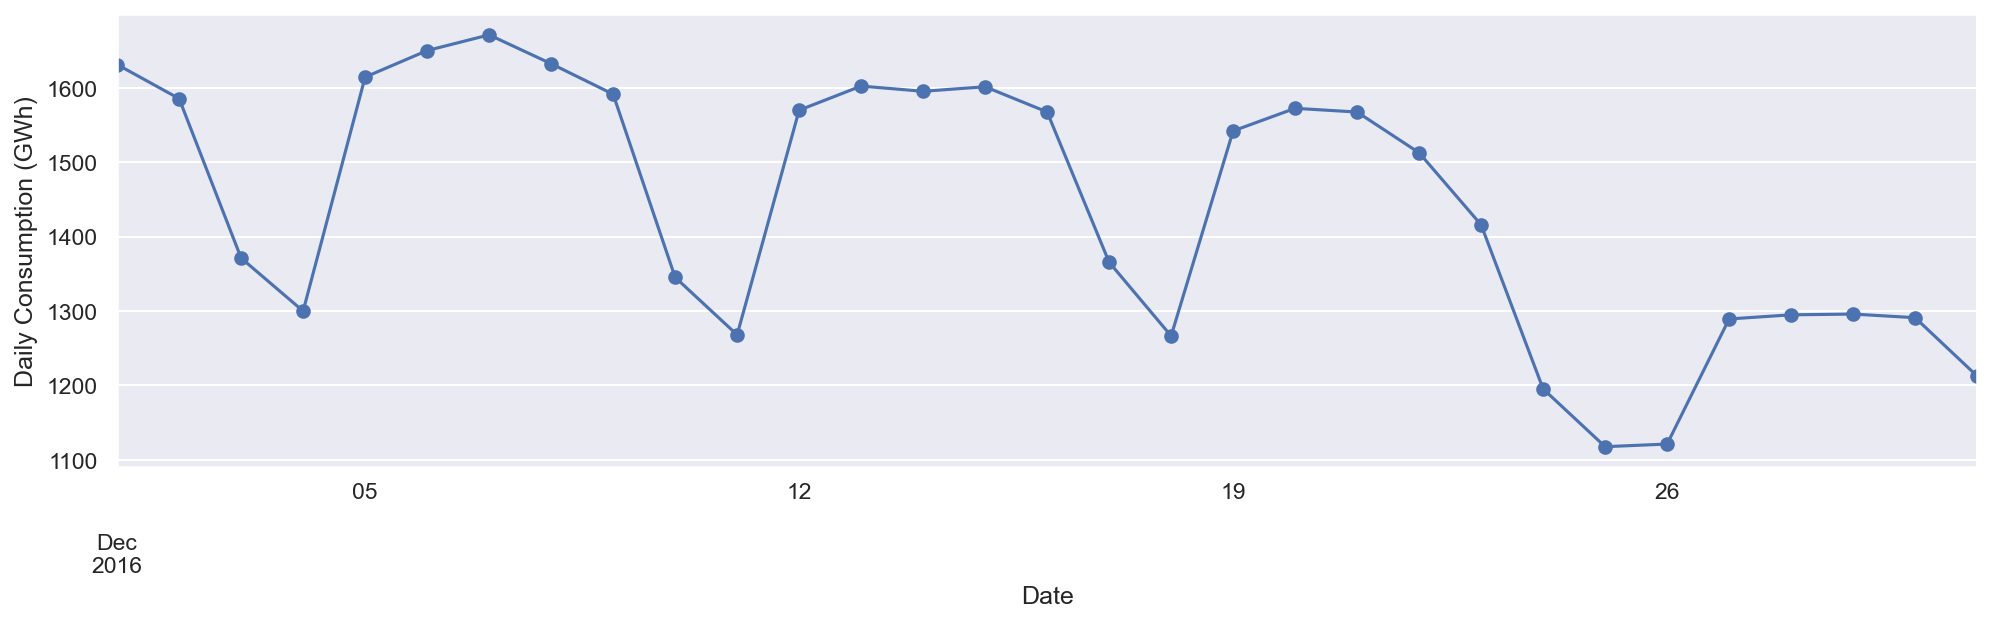

In [53]:
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

In [54]:
# import dates module from matplotlib 
import matplotlib.dates as mdates

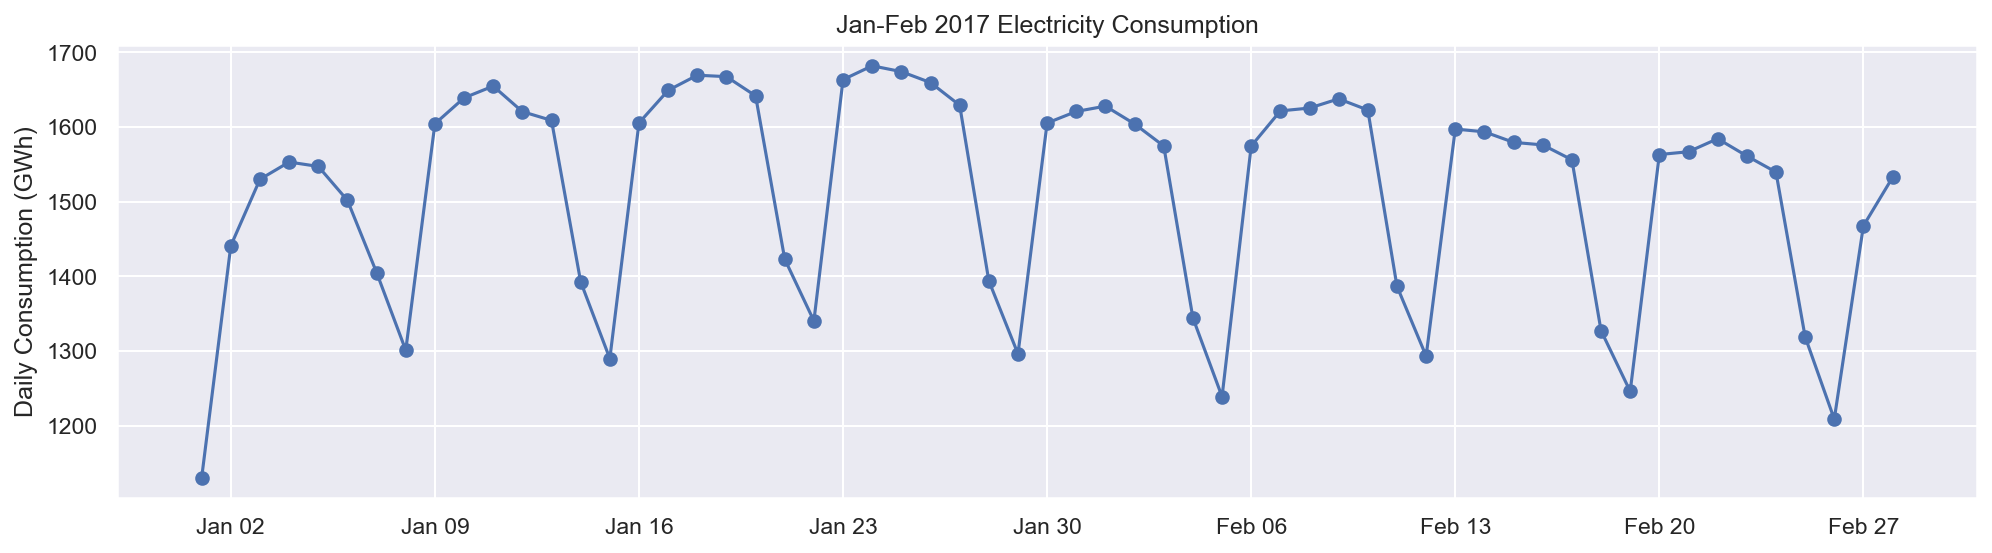

In [55]:
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

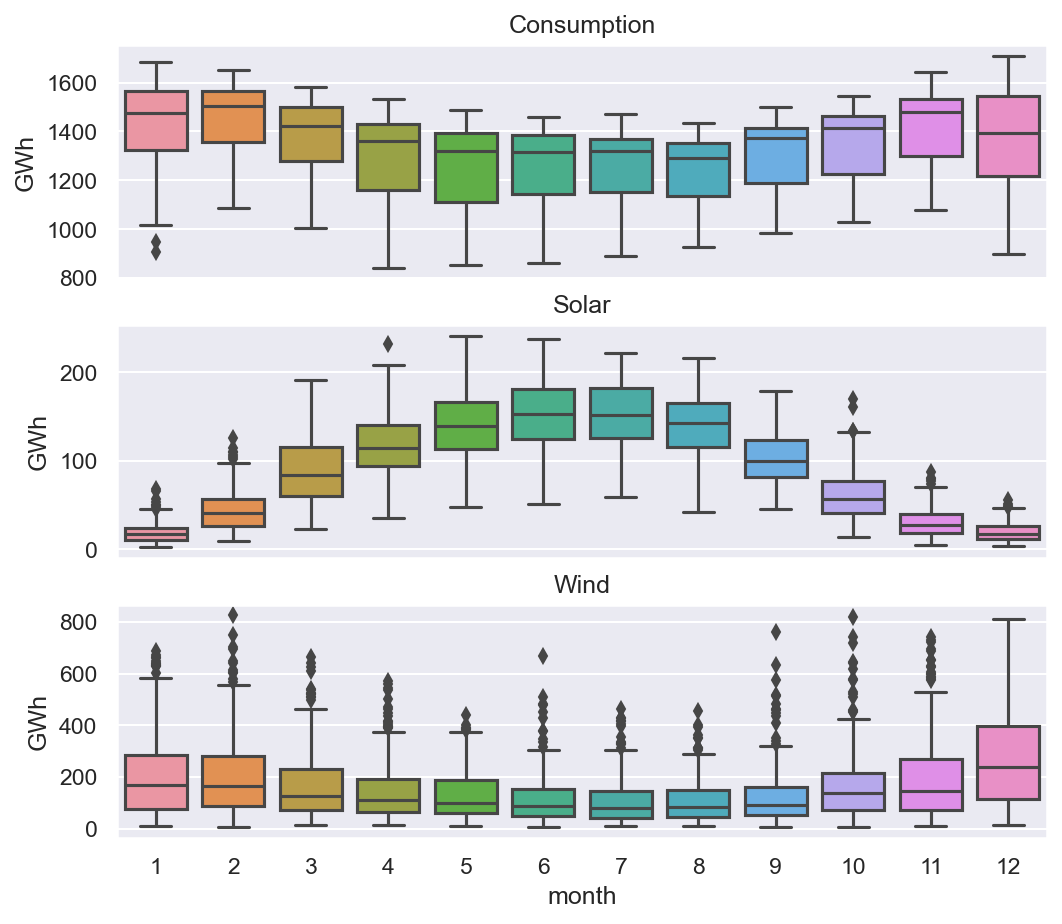

In [56]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df_power, x='month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  

In [57]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-29,1419.077067,485.735571,44.344857,530.080429
2017-11-05,1326.164499,300.840286,49.796857,350.637143
2017-11-12,1472.113604,273.502143,21.129000,294.631143
2017-11-19,1491.885550,329.920000,28.595143,358.515143
2017-11-26,1488.566089,452.703286,25.847857,478.551143
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571


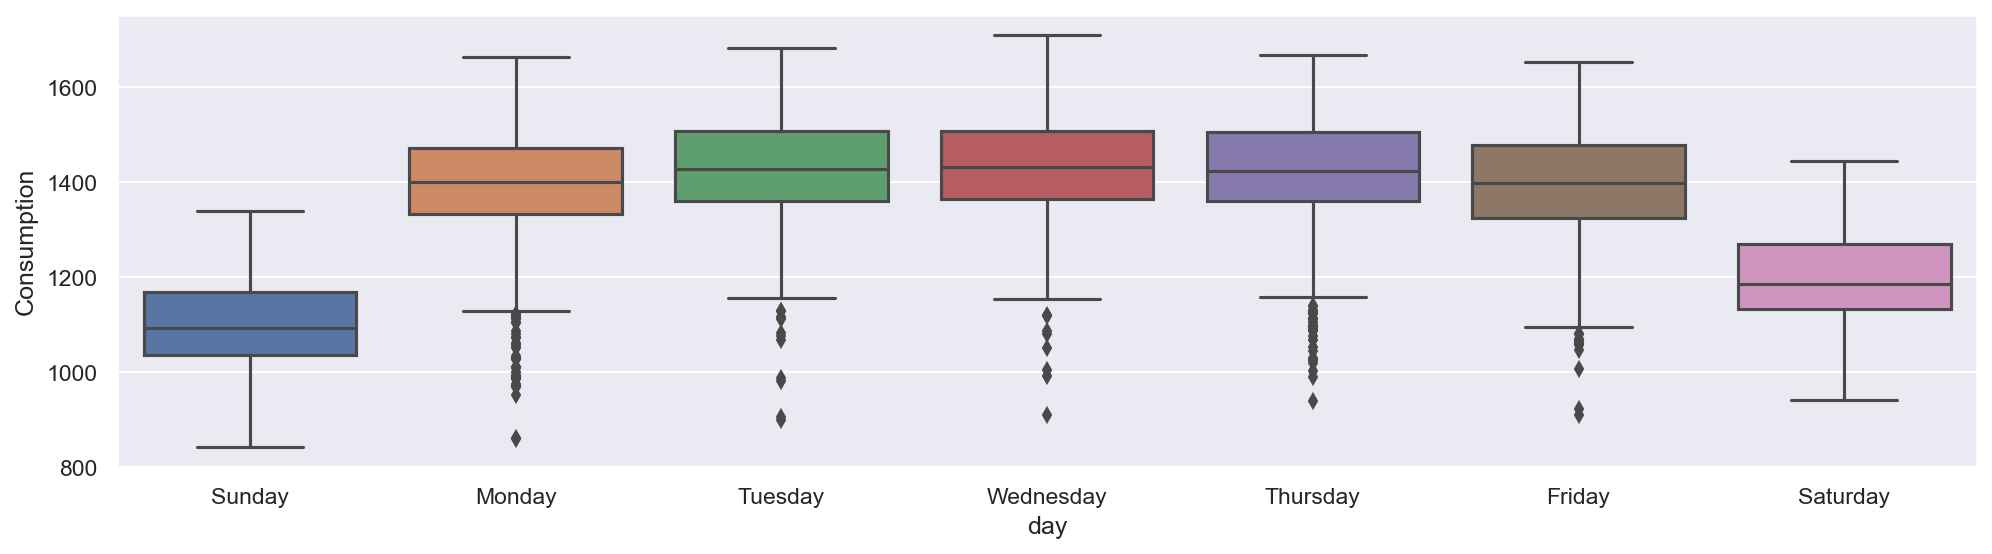

In [58]:
sns.boxplot(data=df_power, x='day', y='Consumption');

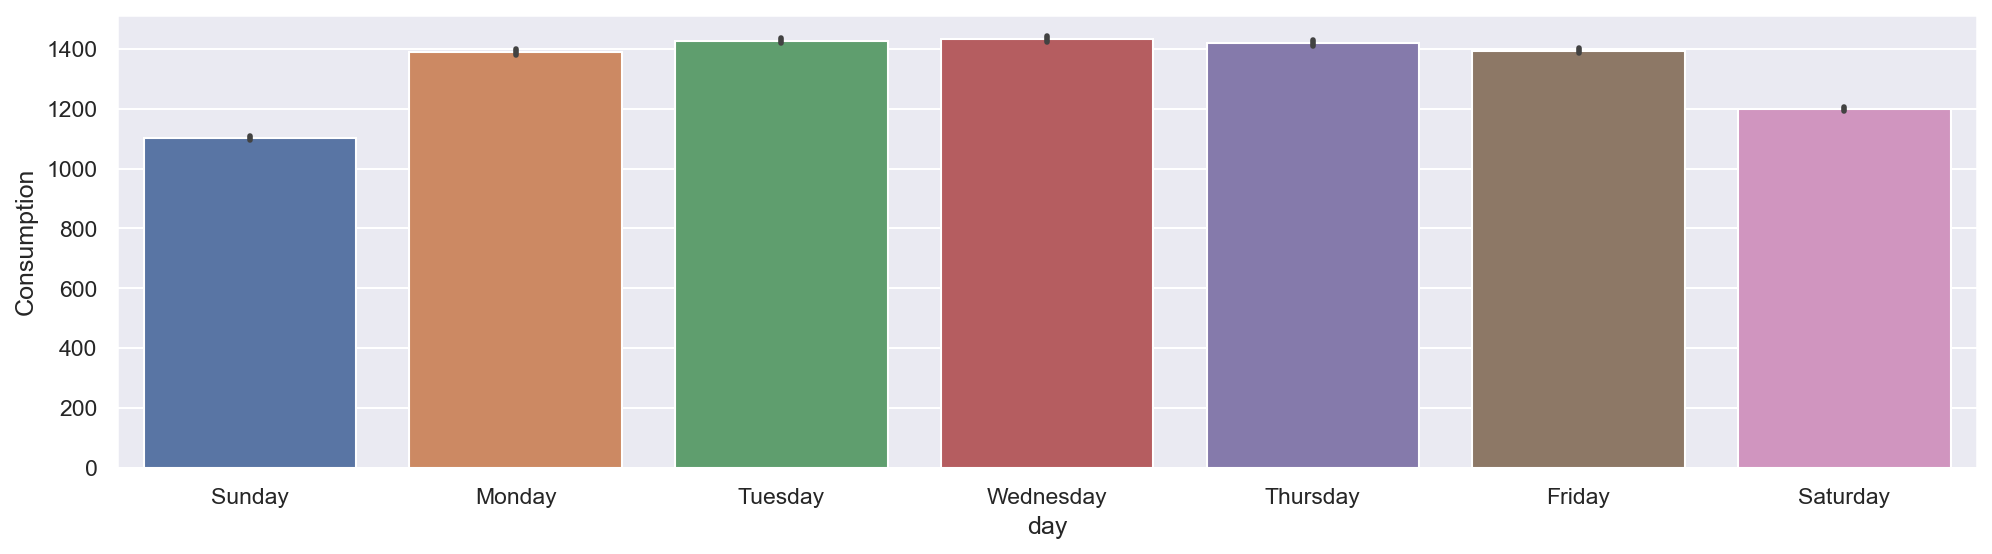

In [59]:
sns.barplot(data=df_power, x='day', y='Consumption');

In [60]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


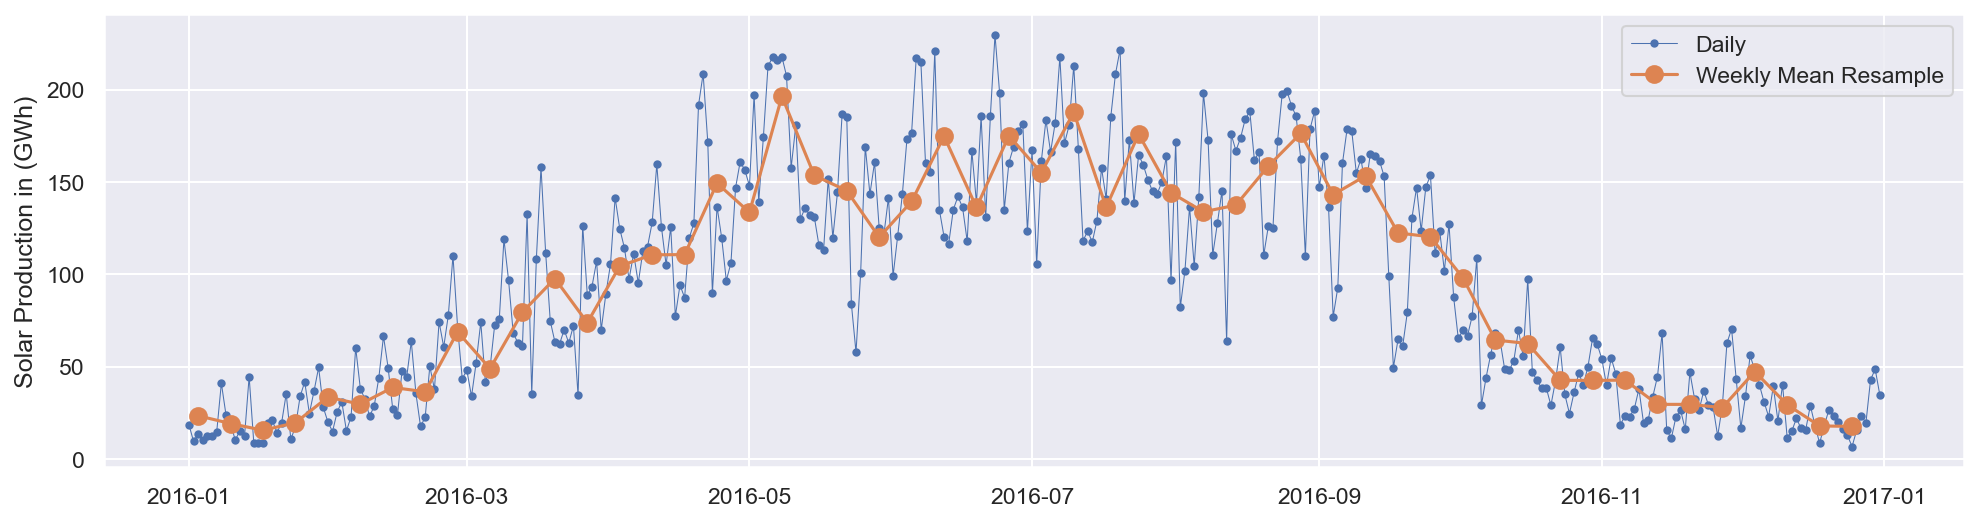

In [61]:
start, end = '2016-01', '2016-12'
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();

In [76]:
dff=df_power.copy()
dff1=pd.DataFrame(dff.iloc[:,0])


In [77]:
dff1



,Consumption
Date,
2006-01-01,1069.18400
2006-01-02,1380.52100
2006-01-03,1442.53300
2006-01-04,1457.21700
2006-01-05,1477.13100
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753


In [67]:
dff1.sort_index(ascending=False)

Date
2017-12-31    721.176
2017-12-30    721.247
2017-12-29    584.277
2017-12-28    506.424
2017-12-27    394.507
               ...   
2006-01-05        NaN
2006-01-04        NaN
2006-01-03        NaN
2006-01-02        NaN
2006-01-01        NaN
Name: Wind, Length: 4383, dtype: float64

In [79]:
dff

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D


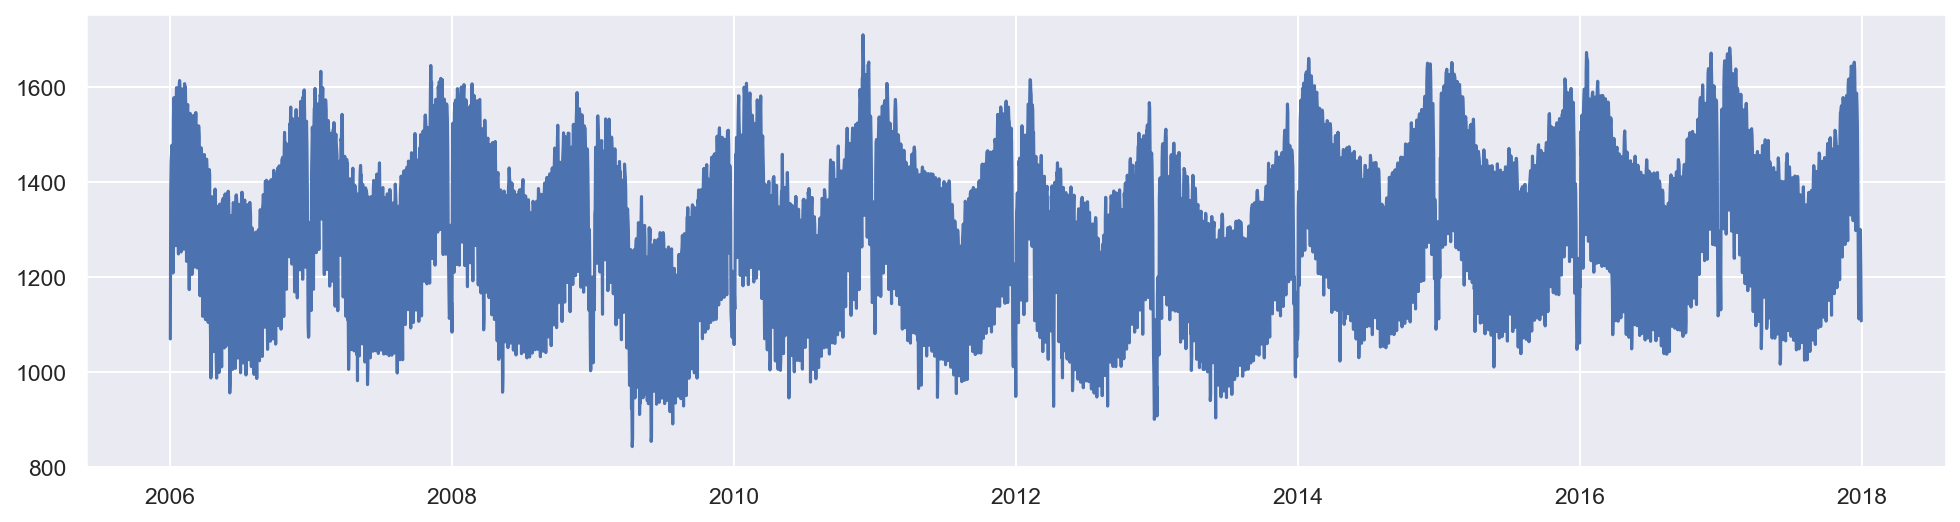

In [80]:
# load the dataset
plt.plot(dff1)

#Convert pandas dataframe to numpy array
dataset = dff1.values
dataset = dataset.astype('float32') #COnvert values to float

In [81]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

We cannot use random way of splitting dataset into train and test as
the sequence of events is important for time series.
So let us take first 60% values for train and the remaining 1/3 for testing
split into train and test sets

In [82]:

train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [83]:
# We cannot fit the model like we normally do for image processing where we have
#X and Y. We need to transform our data into something that looks like X and Y values.
# This way it can be trained on a sequence rather than indvidual datapoints. 
# Let us convert into n number of columns for X where we feed sequence of numbers
#then the final column as Y where we provide the next number in the sequence as output.
# So let us convert an array of values into a dataset matrix

#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.

#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

seq_size = 10  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)



print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))


Shape of training set: (2881, 10)
Shape of test set: (1480, 10)


In [84]:
# Reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
#print('Single LSTM with hidden Dense...')
#model = Sequential()
#model.add(LSTM(64, input_shape=(None, seq_size)))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
##monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
##                        verbose=1, mode='auto', restore_best_weights=True)
#model.summary()
#print('Train...')

In [85]:
#Stacked LSTM with 1 hidden dense layer
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
#model = Sequential()
#model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
#model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#
#model.summary()
#print('Train...')

In [86]:
#Bidirectional LSTM
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
##For some sequence forecasting problems we may need LSTM to learn
## sequence in both forward and backward directions
#from keras.layers import Bidirectional
#model = Sequential()
#model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_size)))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()
#print('Train...')

In [87]:
#ConvLSTM
#The layer expects input as a sequence of two-dimensional images, 
#therefore the shape of input data must be: [samples, timesteps, rows, columns, features]

trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#print('Train...')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 64)          19200     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
91/91 - 0s - loss: 0.0518 - val_loss: 0.0167
Epoch 2/100
91/91 - 0s - loss: 0.0130 - val_loss: 0.0106
Epoch 3/100
91/91 - 0s - loss: 0.0093 - val_loss: 0.0091
Epoch 4/100
91/91 - 0s - loss: 0.0081 - val_loss: 0.0073
Epoch 5/100
91/91 - 0s - loss: 0.0071 - val_loss: 0.0068
Epoch 6/100
91/91 - 0s - loss: 0.0068 - val_loss: 0.0066
Epoch 7/100
91/91 - 0s - loss: 0.0064 - val_loss: 0.0062
Epoch 8/100
91/91 - 0s - loss: 0.0062 - val_loss: 0.0059
Epoch 9/100
91/91 - 0s - loss: 0.0060 - val_loss: 0.0062
Epoch 10/100
91/91 - 0s - loss: 0.0059 - val_loss: 0.0057
Epoch 11/100
91/91 - 0s - loss: 0.0058 - val_loss: 0.0067
Epoch 12/100
91/91 - 0s - loss: 0.0059 - val_loss: 0.0054
Epoch 13/100
91/91 - 0s - loss: 0.0056 - val_loss: 0.0057
Epoch 14/100
91/91 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 15/100
91/91 - 0s - loss: 0.0055 - val_loss: 0.0081
Epoch 16/100
91/91 - 0s - loss: 0.0064 - val_loss: 0.0051
Epoch 17/100
91/91 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 18/100
91/91 - 0s

In [89]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [90]:
# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [91]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 50.29 RMSE
Test Score: 50.11 RMSE


In [92]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [93]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

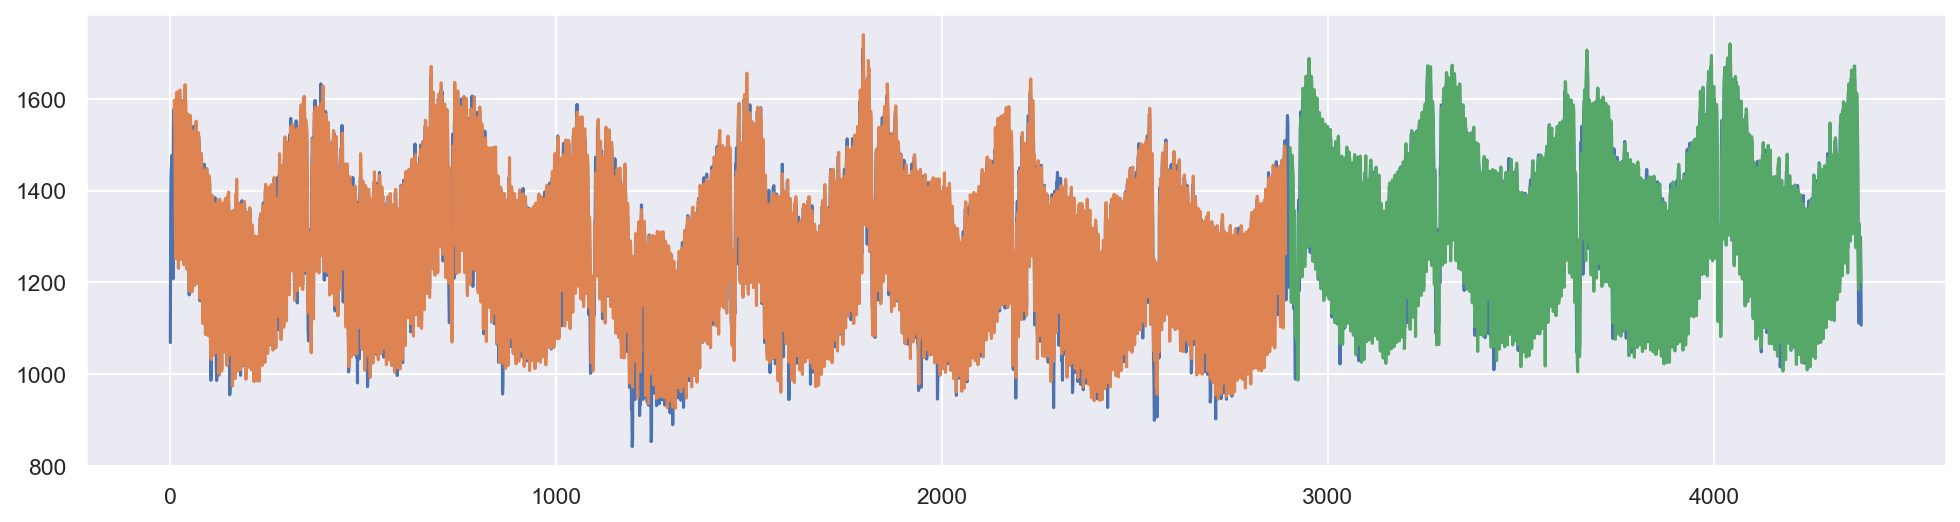

In [94]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()